In [45]:
# Team 6, project 2: Our goal is to predict winners and losers in the UEFA Euro 2024 tournament now underway in Germany.  
# The competition began in March 2023 with 54 European national men's teams, from which 20 teams made it into the current 
# group stage.  We'll use results from qualifying rounds and other international friendlies, as well as published predictions, an
# d subject-area-specific measures such as Expected Goals (Xg).



In [47]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
# Load the dataset

df = pd.read_csv(r'C:\Users\KURTD\AIBootcamp\Repo\Project2\euros2024\Resources\euro_team_data.csv')

# Display the first few rows of the dataframe
df.head()

,id_match,date,source,home_or_away,team_code,team_xG,team_odds,opponent_code,opponent_xG,opponent_odds,team_score,opponent_score,match_attendance,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width,target_top_4
0,2036436,10/12/2023,Qualifiers,1,ALB,-2.2,48468,CZE,-1.4,15861,3,0,20917,41.318403,19.823953,105,68,0
1,2040328,3/22/2024,Friendlies,1,ALB,-2.2,48468,CHI,-3.0,70000,0,3,21425,44.794981,10.338325,105,68,0
2,2039019,10/17/2023,Friendlies,1,ALB,-2.2,48468,BUL,-3.0,70000,2,0,17232,41.318403,19.823953,105,68,0
3,2034801,6/13/2022,Friendlies,1,ALB,-2.2,48468,EST,-3.0,70000,0,0,21425,41.318403,19.823953,105,68,0
4,2034569,9/27/2022,Nations,1,ALB,-2.2,48468,ISL,-3.0,70000,1,1,8800,41.318403,19.823953,105,68,0


In [62]:
# List columns
df.columns

Index(['id_match', 'date', 'source', 'home_or_away', 'team_code', 'team_xG',
       'team_odds', 'opponent_code', 'opponent_xG', 'opponent_odds',
       'team_score', 'opponent_score', 'match_attendance', 'stadium_latitude',
       'stadium_longitude', 'stadium_pitch_length', 'stadium_pitch_width',
       'target_top_4'],
      dtype='object')

In [63]:
# List Values
df.values

array([[2036436, '10/12/2023', 'Qualifiers', ..., 105, 68, 0],
       [2040328, '3/22/2024', 'Friendlies', ..., 105, 68, 0],
       [2039019, '10/17/2023', 'Friendlies', ..., 105, 68, 0],
       ...,
       [2036366, '6/19/2023', 'Qualifiers', ..., 105, 68, 0],
       [2034553, '9/25/2022', 'Nations', ..., 105, 68, 0],
       [2040594, '6/9/2024', 'Friendlies', ..., 105, 68, 0]], dtype=object)

In [49]:
## Graphing Section

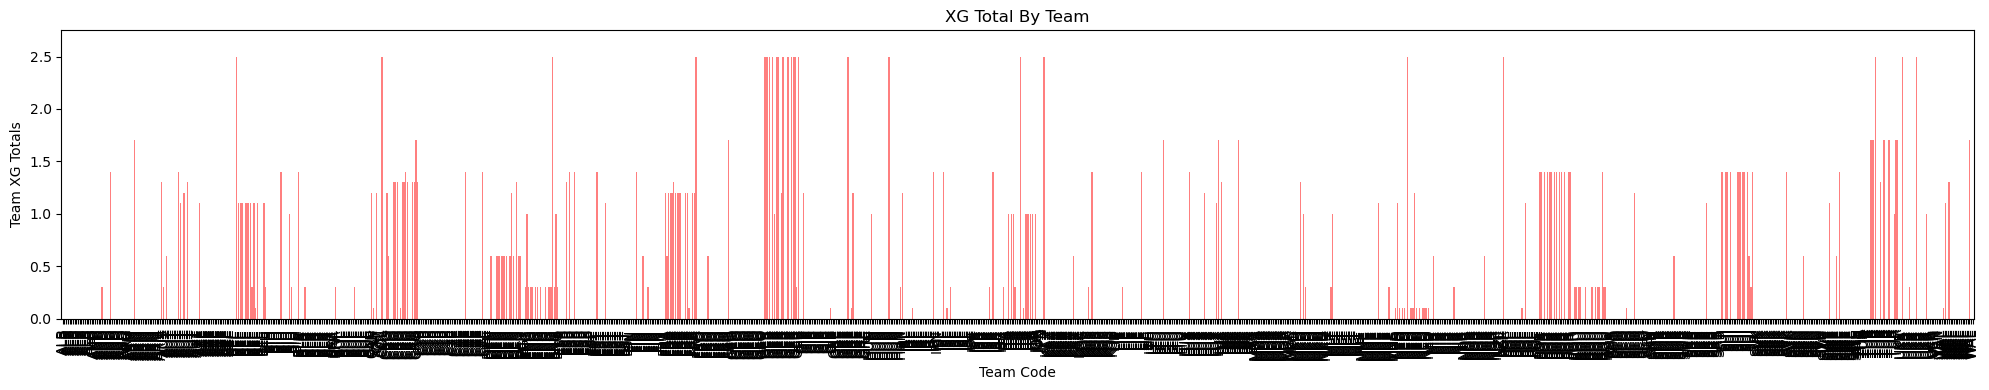

In [84]:
# Plotting a bar chart of the total Expected Goals (XG) by team

# Assuming df is already defined

# Check if 'team_xg' and 'team_code' columns exist in df
required_columns = ['team_odds', 'team_code']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")

x_axis = np.arange(len(df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,4))
plt.bar(x_axis, df["team_xG"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, df["team_code"], rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(df["team_xG"])*1.1)

plt.title("XG Total By Team")
plt.xlabel("Team Code")
plt.ylabel("Team XG Totals")

plt.tight_layout()
# plt.savefig("../Images/avg_state_rain.png")
plt.show()




[Text(0, 0, 'GER'),
 Text(1, 0, 'EST'),
 Text(2, 0, 'LUX'),
 Text(3, 0, 'POR'),
 Text(4, 0, 'KAZ'),
 Text(5, 0, 'MNE'),
 Text(6, 0, 'IRL'),
 Text(7, 0, 'ISL'),
 Text(8, 0, 'ITA'),
 Text(9, 0, 'AND'),
 Text(10, 0, 'LIE'),
 Text(11, 0, 'LTU'),
 Text(12, 0, 'LVA'),
 Text(13, 0, 'MDA'),
 Text(14, 0, 'MKD'),
 Text(15, 0, 'MLT'),
 Text(16, 0, 'NED'),
 Text(17, 0, 'GRE'),
 Text(18, 0, 'NIR'),
 Text(19, 0, 'NOR'),
 Text(20, 0, 'POL'),
 Text(21, 0, 'ROU'),
 Text(22, 0, 'SCO'),
 Text(23, 0, 'SMR'),
 Text(24, 0, 'SRB'),
 Text(25, 0, 'SUI'),
 Text(26, 0, 'SVK'),
 Text(27, 0, 'SVN'),
 Text(28, 0, 'SWE'),
 Text(29, 0, 'TUR'),
 Text(30, 0, 'UKR'),
 Text(31, 0, 'HUN'),
 Text(32, 0, 'WAL'),
 Text(33, 0, 'GIB'),
 Text(34, 0, 'CZE'),
 Text(35, 0, 'CRO'),
 Text(36, 0, 'DEN'),
 Text(37, 0, 'BUL'),
 Text(38, 0, 'ENG'),
 Text(39, 0, 'ESP'),
 Text(40, 0, 'BLR'),
 Text(41, 0, 'CYP'),
 Text(42, 0, 'FIN'),
 Text(43, 0, 'BEL'),
 Text(44, 0, 'FRA'),
 Text(45, 0, 'AUT'),
 Text(46, 0, 'FRO'),
 Text(47, 0, 'ARM'),
 T

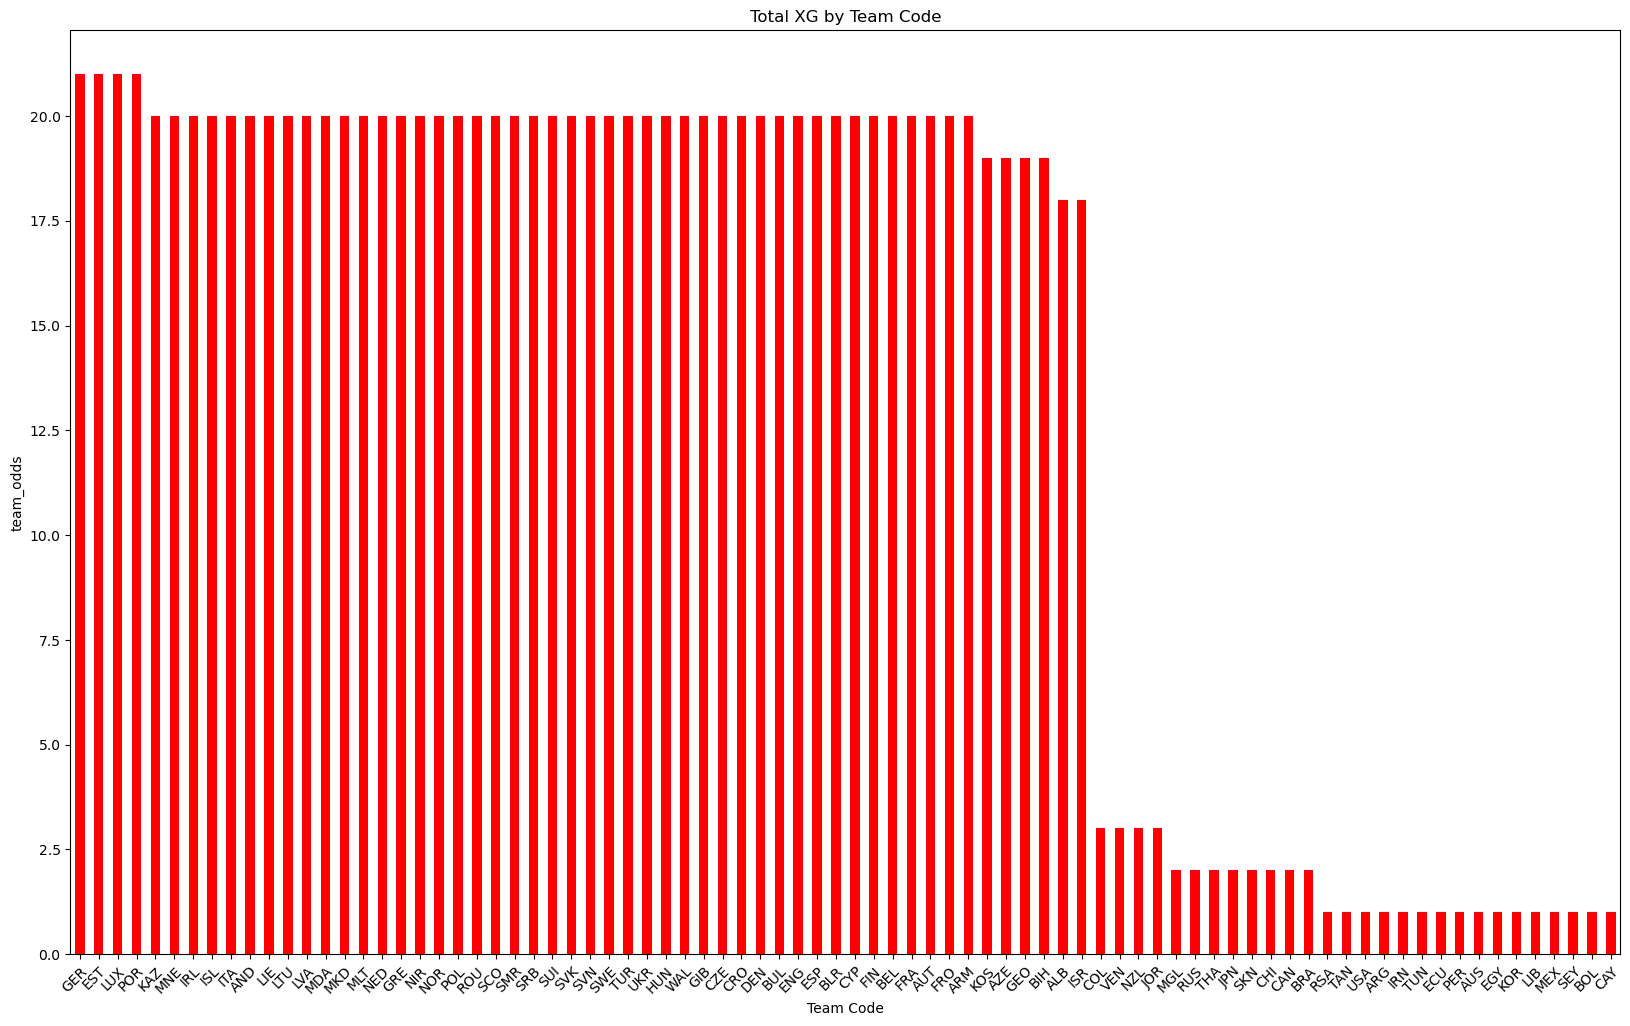

In [83]:
# Bar Chart

# Get total xG by team code
team_data = df["team_code"].value_counts()

# Configure plot, figsize, title, and axis labels
figure1 = team_data.plot(kind="bar", facecolor="red", figsize=(20,12),
                                title="Total XG by Team Code",
                                xlabel="Team Code",
                                ylabel="team_odds")

# Configure x-tick rotation
xticklabels = team_data.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot

In [72]:
# Scatter Plot

# Set the 'team_code' as our index
team_data2 = df.set_index('team_code')


team_data2.head()

,id_match,date,source,home_or_away,team_xG,team_odds,opponent_code,opponent_xG,opponent_odds,team_score,opponent_score,match_attendance,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width,target_top_4
team_code,,,,,,,,,,,,,,,,,
ALB,2036436,10/12/2023,Qualifiers,1,-2.2,48468,CZE,-1.4,15861,3,0,20917,41.318403,19.823953,105,68,0
ALB,2040328,3/22/2024,Friendlies,1,-2.2,48468,CHI,-3.0,70000,0,3,21425,44.794981,10.338325,105,68,0
ALB,2039019,10/17/2023,Friendlies,1,-2.2,48468,BUL,-3.0,70000,2,0,17232,41.318403,19.823953,105,68,0
ALB,2034801,6/13/2022,Friendlies,1,-2.2,48468,EST,-3.0,70000,0,0,21425,41.318403,19.823953,105,68,0
ALB,2034569,9/27/2022,Nations,1,-2.2,48468,ISL,-3.0,70000,1,1,8800,41.318403,19.823953,105,68,0


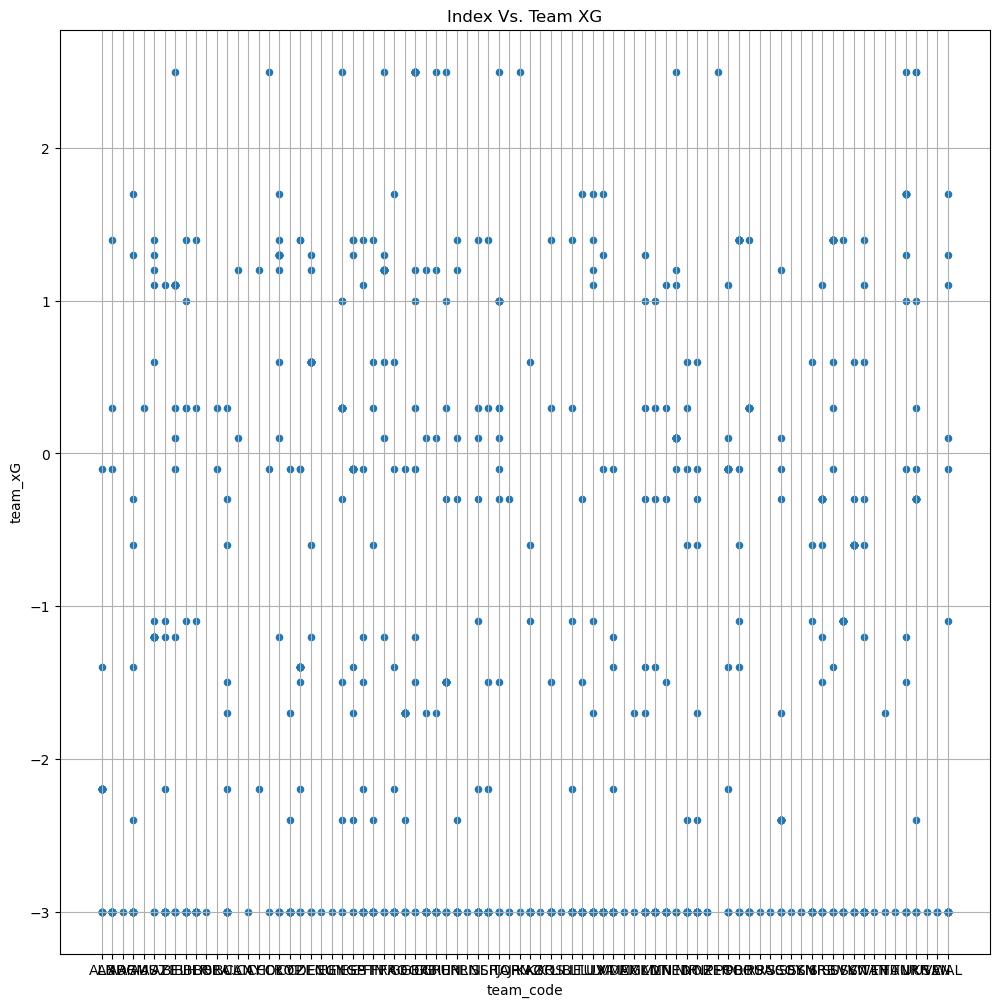

In [80]:
# Reset the index to turn it into a column
team_data2_reset = team_data2.reset_index()

# Use the new column ('index' by default) for the x-axis
team_data2_reset.plot(kind="scatter", x="team_code", y="team_xG", grid=True, figsize=(12,12),
                      title="Index Vs. Team XG")
plt.show()


In [ ]:
## Prediction Section

In [25]:
# Check the value_counts of the target column
df["target_top_4"].value_counts()

target_top_4
0.0    1024
1.0      96
Name: count, dtype: int64

In [26]:
# Check the data types
df.dtypes

id_match                float64
team_code                object
team_xG                  object
team_odds                object
opponent_xG              object
opponent_odds           float64
team_score              float64
opponent_score          float64
team_penalty            float64
opponent_penalty        float64
home_score_total        float64
away_score_total        float64
date                     object
match_attendance        float64
stadium_latitude        float64
stadium_longitude       float64
stadium_pitch_length     object
stadium_pitch_width      object
penalties_missed         object
penalties                object
source                   object
target_top_4            float64
opponent_code            object
home_or_away             object
dtype: object

In [28]:
# Get the target variable (the "target_top_4" column)
y = df["target_top_4"]
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1123    NaN
1124    NaN
1125    NaN
1126    NaN
1127    NaN
Name: target_top_4, Length: 1128, dtype: float64

In [42]:
# Get the features (everything except the "target_top_4" column)
X = df.copy()
X = X.drop(columns="target_top_4")
X.head()

,id_match,team_code,team_xG,team_odds,opponent_xG,opponent_odds,team_score,opponent_score,team_penalty,opponent_penalty,...,match_attendance,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width,penalties_missed,penalties,source,opponent_code,home_or_away
0,2036436.0,ALB,-2.2,48468,-1.4,15861.0,3.0,0.0,NaN,NaN,...,20917.0,41.318403,19.823953,105,68,NaN,NaN,Qualifiers,CZE,home
1,2040328.0,ALB,-2.2,48468,-3,70000.0,0.0,3.0,NaN,NaN,...,NaN,44.794981,10.338325,105,68,NaN,NaN,Friendlies,CHI,home
2,2039019.0,ALB,-2.2,48468,-3,70000.0,2.0,0.0,NaN,NaN,...,17232.0,41.318403,19.823953,105,68,NaN,NaN,Friendlies,BUL,home
3,2034801.0,ALB,-2.2,48468,-3,70000.0,0.0,0.0,NaN,NaN,...,0.0,41.318403,19.823953,105,68,NaN,NaN,Friendlies,EST,home
4,2034569.0,ALB,-2.2,48468,-3,70000.0,1.0,1.0,NaN,NaN,...,8800.0,41.318403,19.823953,105,68,NaN,NaN,Nations,ISL,home


In [43]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
# Since the target column is an object, we need to convert the data to numerical classes
# Encode the y data
# Create an instance of the label encoder
le = LabelEncoder()

# Fit and transform the y training and testing data using the label encoder
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
y_train_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
# Remember that all of the columns in the DataFrame are objects
# Use a OneHotEncoder to convert the training data to numerical values
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')
X_train_encoded = pd.DataFrame(data=ohe.fit_transform(X_train), columns=ohe.get_feature_names_out())
X_train_encoded



,id_match_2034411.0,id_match_2034412.0,id_match_2034413.0,id_match_2034414.0,id_match_2034417.0,id_match_2034418.0,id_match_2034419.0,id_match_2034420.0,id_match_2034422.0,id_match_2034423.0,...,opponent_code_THA,opponent_code_TUN,opponent_code_TUR,opponent_code_UKR,opponent_code_VEN,opponent_code_WAL,opponent_code_odds,opponent_code_nan,home_or_away_away,home_or_away_home
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [33]:
# Encode the test data
X_test_encoded = pd.DataFrame(data=ohe.transform(X_test), columns=ohe.get_feature_names_out())
X_test_encoded

,id_match_2034411.0,id_match_2034412.0,id_match_2034413.0,id_match_2034414.0,id_match_2034417.0,id_match_2034418.0,id_match_2034419.0,id_match_2034420.0,id_match_2034422.0,id_match_2034423.0,...,opponent_code_THA,opponent_code_TUN,opponent_code_TUR,opponent_code_UKR,opponent_code_VEN,opponent_code_WAL,opponent_code_odds,opponent_code_nan,home_or_away_away,home_or_away_home
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
280,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
## Model and Fit to a Logistic Regression Classifier

In [34]:
# Create the support vector machine classifier model with a 'poly' kernel
svm_model = SVC(kernel='poly')

# Fit the model to the training data
svm_model.fit(X_train_encoded, y_train_encoded)

SVC(kernel='poly')

In [35]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % svm_model.score(X_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % svm_model.score(X_test_encoded, y_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


In [ ]:
## Model and Fit to a KNN Model

In [36]:
# Create the KNN model with 9 neighbors
knn_model = KNeighborsClassifier(n_neighbors=9)

# Fit the model to the training data
knn_model.fit(X_train_encoded, y_train_encoded)

KNeighborsClassifier(n_neighbors=9)

In [37]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % knn_model.score(X_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % knn_model.score(X_test_encoded, y_test_encoded))

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [ ]:
## Model and Fit to a Decision Tree Classifier

In [38]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_encoded, y_train_encoded)

DecisionTreeClassifier()

In [39]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % dt_model.score(X_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % dt_model.score(X_test_encoded, y_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


In [ ]:
## Model and Fit to a Random Forest Classifier

In [40]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_encoded, y_train_encoded)

RandomForestClassifier(n_estimators=128, random_state=1)

In [41]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % rf_model.score(X_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % rf_model.score(X_test_encoded, y_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000
